Customer Segmentation Analysis :-

1) Dataset Description :-

The project utilizes the ifood_df.csv dataset, which contains comprehensive customer information for an e-commerce company including:
                                                                                    
* Customer demographics (income, age, family structure)
* Purchase history across multiple product categories
* Marketing campaign responses
* Channel preferences (web, store, catalog purchases)

2) Key Objectives:-
                                                                                    
* Segment customers based on purchasing behavior and demographics
* Identify distinct customer groups for targeted marketing strategies
* Analyze customer characteristics to improve satisfaction and business performance
* Provide actionable insights for marketing and business strategy optimization

3) Deliverables:-
                             
* Customer segmentation using clustering algorithms
* Visual analysis of customer segments
* Business recommendations for each segment
* Interactive data visualizations

4) Key Concepts & Challenges :-
   
    1. Data Collection: Obtain a dataset containing customer information, purchase history, and
    relevant data.

    2. Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle
    any missing or inconsistent data.

    3. Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of
    purchases, etc.

    4. Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment
    customers based on behavior and purchase patterns.

    5. Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer
    segments.

    6. Insights and Recommendations: Analyze characteristics of each segment and provide
    insights

In [14]:
print("\n1. DATA LOADING AND EXPLORATION")

import pandas as pd
print("-" * 40)

# Load the dataset
df = pd.read_csv("E:/OIBSIP/Task -2/ifood_df.csv")

print(f"Dataset Shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display basic information
print("\nDataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())



1. DATA LOADING AND EXPLORATION
----------------------------------------
Dataset Shape: (2205, 39)
Number of customers: 2205
Number of features: 39

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalog

In [17]:
print("\n2. DATA CLEANING AND PREPROCESSING")
print("-" * 40)

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values if any
df_clean = df.dropna()

# Create additional features for analysis
df_clean['TotalPurchases'] = (df_clean['NumWebPurchases'] + 
                             df_clean['NumCatalogPurchases'] + 
                             df_clean['NumStorePurchases'])

df_clean['TotalCampaignsAccepted'] = (df_clean['AcceptedCmp1'] + 
                                     df_clean['AcceptedCmp2'] + 
                                     df_clean['AcceptedCmp3'] + 
                                     df_clean['AcceptedCmp4'] + 
                                     df_clean['AcceptedCmp5'])

print(f"Cleaned dataset shape: {df_clean.shape}")
print("New features created: TotalPurchases, TotalCampaignsAccepted")



2. DATA CLEANING AND PREPROCESSING
----------------------------------------
Missing values per column:
Series([], dtype: int64)
Cleaned dataset shape: (2205, 41)
New features created: TotalPurchases, TotalCampaignsAccepted


In [16]:
print("\n3. DESCRIPTIVE STATISTICS")
print("-" * 40)

import pandas as pd

# Load dataset
df = pd.read_csv("E:/OIBSIP/Task -2/ifood_df.csv")

# Create Total Purchases column
df['TotalPurchases'] = df[['NumDealsPurchases','NumWebPurchases',
                           'NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

# Clean dataset (drop missing values if any)
df_clean = df.dropna().copy()

# Key metrics calculation
key_metrics = {
    'Average Income': df_clean['Income'].mean(),
    'Average Age': df_clean['Age'].mean(),
    'Average Total Spending': df_clean['MntTotal'].mean(),
    'Average Purchase Frequency': df_clean['TotalPurchases'].mean(),
    'Total Customers': len(df_clean)
}

print("Key Business Metrics:")
for metric, value in key_metrics.items():
    if 'Average' in metric and 'Customers' not in metric:
        print(f"{metric}: ${value:,.2f}" if 'Income' in metric or 'Spending' in metric else f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value:,}")

# Statistical summary
print("\nStatistical Summary of Key Variables:")
summary_cols = ['Income', 'Age', 'MntTotal', 'TotalPurchases', 'NumWebVisitsMonth']
print(df_clean[summary_cols].describe())



3. DESCRIPTIVE STATISTICS
----------------------------------------
Key Business Metrics:
Average Income: $51,622.09
Average Age: 51.10
Average Total Spending: $562.76
Average Purchase Frequency: 14.89
Total Customers: 2,205

Statistical Summary of Key Variables:
              Income          Age     MntTotal  TotalPurchases  \
count    2205.000000  2205.000000  2205.000000     2205.000000   
mean    51622.094785    51.095692   562.764626       14.887982   
std     20713.063826    11.705801   575.936911        7.615277   
min      1730.000000    24.000000     4.000000        0.000000   
25%     35196.000000    43.000000    56.000000        8.000000   
50%     51287.000000    50.000000   343.000000       15.000000   
75%     68281.000000    61.000000   964.000000       21.000000   
max    113734.000000    80.000000  2491.000000       43.000000   

       NumWebVisitsMonth  
count        2205.000000  
mean            5.336961  
std             2.413535  
min             0.000000  
25%   


4. CUSTOMER SEGMENTATION
----------------------------------------


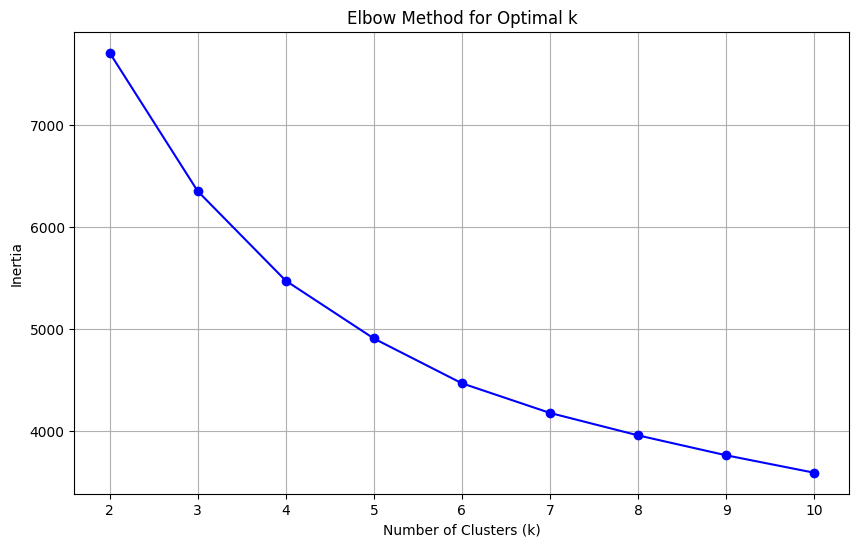

✓ K-means clustering completed with 4 clusters
Cluster distribution:
Cluster
0    186
1    781
2    691
3    547
Name: count, dtype: int64


In [18]:
print("\n4. CUSTOMER SEGMENTATION")
print("-" * 40)

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create TotalCampaignsAccepted (sum of all campaign responses)
df_clean['TotalCampaignsAccepted'] = df_clean[['AcceptedCmp1','AcceptedCmp2',
                                               'AcceptedCmp3','AcceptedCmp4',
                                               'AcceptedCmp5','Response']].sum(axis=1)

# Select features for clustering
clustering_features = ['Income', 'Age', 'MntTotal', 'TotalPurchases', 
                       'NumWebVisitsMonth', 'TotalCampaignsAccepted']

# Prepare data for clustering
X = df_clean[clustering_features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Apply K-means with optimal clusters (assuming k=4 based on elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_clean['Cluster'] = cluster_labels

print(f"✓ K-means clustering completed with {optimal_k} clusters")
print(f"Cluster distribution:")
print(df_clean['Cluster'].value_counts().sort_index())



5. VISUALIZATION
----------------------------------------
Cluster Characteristics (Average Values):
           Income    Age  MntTotal  TotalPurchases  NumWebVisitsMonth  \
Cluster                                                                 
0        78427.06  50.12   1466.54           19.65               3.78   
1        31851.81  43.07     95.49            6.18               6.94   
2        70212.31  52.83   1077.52           19.66               3.62   
3        47251.03  60.69    272.35           10.33               5.75   

         TotalCampaignsAccepted  
Cluster                          
0                          2.81  
1                          0.21  
2                          0.27  
3                          0.22  


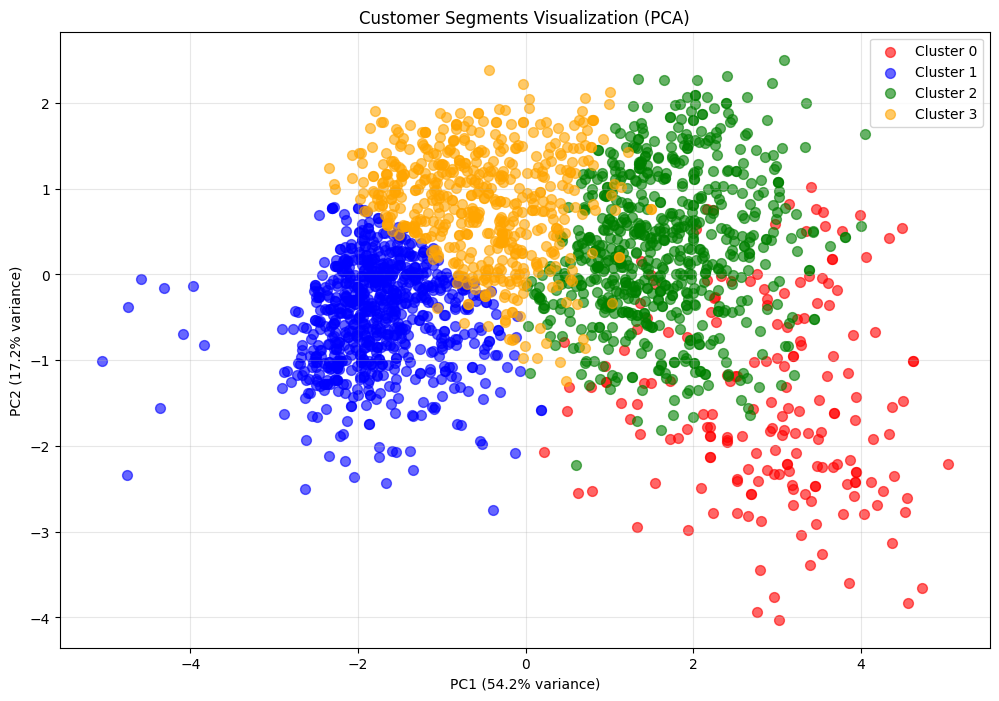

✓ Cluster visualization completed


In [19]:
print("\n5. VISUALIZATION")
print("-" * 40)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Re-define clustering features (must match section #6)
clustering_features = ['Income', 'Age', 'MntTotal', 'TotalPurchases', 
                       'NumWebVisitsMonth', 'TotalCampaignsAccepted']

# Prepare data again (in case this cell runs standalone)
X = df_clean[clustering_features].copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with the same number of clusters (optimal_k=4 from previous step)
from sklearn.cluster import KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe (if not already there)
df_clean['Cluster'] = cluster_labels

# --- Cluster analysis ---
cluster_summary = df_clean.groupby('Cluster')[clustering_features].mean()
print("Cluster Characteristics (Average Values):")
print(cluster_summary.round(2))

# --- PCA for visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments Visualization (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Cluster visualization completed")


In [20]:
print("\n6. BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("-" * 50)

# Ensure optimal_k matches actual clusters
if "Cluster" in df_clean.columns:
    optimal_k = df_clean['Cluster'].nunique()
else:
    raise ValueError("No clustering found. Please run segmentation before insights.")

# Segment-specific recommendations
segment_insights = {
    0: {
        'name': 'High-Value Customers',
        'characteristics': 'High income, high spending, frequent purchases',
        'strategy': 'Premium products, exclusive offers, loyalty programs'
    },
    1: {
        'name': 'Price-Conscious Customers', 
        'characteristics': 'Lower income, budget-focused, deal-seekers',
        'strategy': 'Discount campaigns, value bundles, promotional offers'
    },
    2: {
        'name': 'Potential Customers',
        'characteristics': 'Moderate income, low engagement, growth potential',
        'strategy': 'Targeted marketing, product recommendations, engagement campaigns'
    },
    3: {
        'name': 'Loyal Regular Customers',
        'characteristics': 'Consistent spending, regular purchases, brand loyal',
        'strategy': 'Retention programs, cross-selling, referral incentives'
    }
}

# Print recommendations
for cluster_id in range(optimal_k):
    insights = segment_insights.get(cluster_id, {
        'name': f'Segment {cluster_id}',
        'characteristics': 'Automatically detected cluster',
        'strategy': 'Further analysis required'
    })
    print(f"\n SEGMENT {cluster_id}: {insights['name']}")
    print(f"   Characteristics: {insights['characteristics']}")
    print(f"   Recommended Strategy: {insights['strategy']}")

print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("Next Steps:")
print("1. Validate segments with business stakeholders")
print("2. Implement targeted marketing campaigns")
print("3. Monitor segment performance over time")
print("4. Refine segmentation strategy based on results")
print("="*60)



6. BUSINESS INSIGHTS AND RECOMMENDATIONS
--------------------------------------------------

🎯 SEGMENT 0: High-Value Customers
   Characteristics: High income, high spending, frequent purchases
   Recommended Strategy: Premium products, exclusive offers, loyalty programs

🎯 SEGMENT 1: Price-Conscious Customers
   Characteristics: Lower income, budget-focused, deal-seekers
   Recommended Strategy: Discount campaigns, value bundles, promotional offers

🎯 SEGMENT 2: Potential Customers
   Characteristics: Moderate income, low engagement, growth potential
   Recommended Strategy: Targeted marketing, product recommendations, engagement campaigns

🎯 SEGMENT 3: Loyal Regular Customers
   Characteristics: Consistent spending, regular purchases, brand loyal
   Recommended Strategy: Retention programs, cross-selling, referral incentives

ANALYSIS COMPLETED SUCCESSFULLY
Next Steps:
1. Validate segments with business stakeholders
2. Implement targeted marketing campaigns
3. Monitor segment perfor